<a href="https://colab.research.google.com/github/pravinkr/auto-encoder-mnist/blob/master/autoencoder_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from keras.layers import Dense, Input
from keras.models import Model

In [0]:
#This is the size of our encoding dimensiton
encoding_dim=32 # 32 floats, Assuming input is 784 floats

#Input placeholder
input_img = Input(shape=(784,))

#encoded is the encoded representation of the input

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

#decoded is the lossy representation of the input
decoded = Dense(64,activation='relu')(encoded)
decoded = Dense(128,activation='relu')(encoded)
decoded = Dense(784,activation='sigmoid')(encoded)

#This model maps input to its reconstruction

autoencoder = Model(input_img,decoded)


In [0]:
#This model maps input to its representation

encoder = Model(input_img,encoded)

In [0]:
#create a placeholder for the encoded input
encoded_input = Input(shape=(encoding_dim,))

#retrive the last layer of the autoencoder model
decoded_layer = autoencoder.layers[-1]

#decoder 

decoder = Model(encoded_input,decoded_layer(encoded_input))



In [0]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')


In [0]:
from keras.datasets import mnist
import numpy as np
(x_train,_), (x_test,_) = mnist.load_data()

In [43]:
#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)


x_train shape (60000, 784)
x_test shape (10000, 784)


In [44]:
autoencoder.fit(x_train,x_train, epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3464 - val_loss: 0.2659
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2583 - val_loss: 0.2463
Epoch 3/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2365 - val_loss: 0.2264
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2150 - val_loss: 0.2039
Epoch 5/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1982 - val_loss: 0.1901
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1858 - val_loss: 0.1801
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1777 - val_loss: 0.1724
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1709 - val_loss: 0.1671
Epoch 9/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1645 - val_loss: 0.1603
Epoch

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

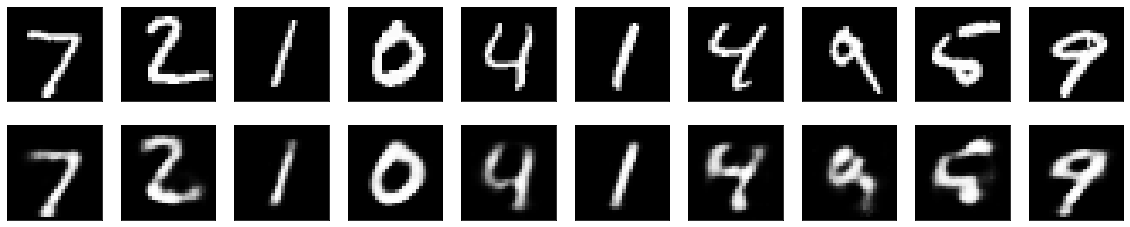

In [46]:
#use matplotlib *don't ask why*

import matplotlib.pyplot as plt

n=10 #how many digits to display
plt.figure(figsize=(20,4))
for i in range(n):
  #display original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


plt.show()

